## CMSC320 Project 3
**Dmitri Kontchaev**

**Exercise 1**

In this part we will simply create a scatter plot of the average of life expectancy in each country across time.

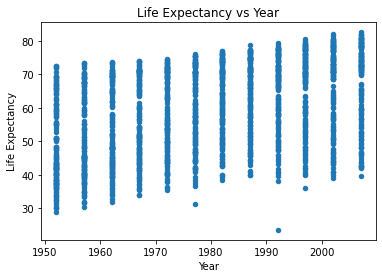

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("gap.tsv", sep='\t')
data.plot.scatter(x='year',y='lifeExp')
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs Year")
plt.show()

**Question 1**<br>
The general trend seems to be that life expectancy is increasing over the years since both the lower bound and upper bound of life expectancy generally tend to increase each year. Simply by looking at the graph, the relationship does appear to be linear.

**Question 2**<br>
The distribution of life expectancy across countries for individual years changes with the years. At first, the distribution is skewed towards more countries having lower life expectancies with a unimodal shape. As time goes on, the distribution becomes skewed towards more countries having higher life expectancies. For a range of years (around 1957-1977) the distribution is slightly bimodal. At no point does the distribution appear entirely symmetrical.

**Question 3**<br>
I would reject the null hypothesis as there does appear to be a correlation between year and life expectancy.

**Question 4**<br>
A violin plot of the residuals would likely look similar to the original violin plot with more negative valued residuals in the earlier years and more positive valued residuals in the later years. 

**Question 5**<br>
The assumptions of the linear regression model suggest that the violin plot of the residuals would show symmetry around the mean residual value of 0. The residual violin plot will also show constant variance of the residuals as the years go on.

**Exercise 2** <br>
In this part we create a linear regression model using Scikit-Learn and Statsmodels

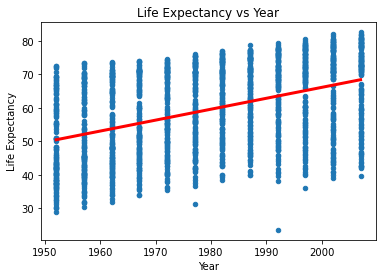

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           7.55e-80
Time:                        23:12:21   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

In [132]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

reg = LinearRegression()
X = np.array(data['year']).reshape(-1, 1)
y = np.array(data['lifeExp']).reshape(-1, 1)

reg.fit(X, y)
y_pred = reg.predict(X)

data.plot.scatter(x='year',y='lifeExp')
plt.plot(X, y_pred, color='red',
         linewidth=3)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs Year")
plt.show()

coeff = reg.coef_[0]
intercept = reg.intercept_

model = smf.ols(formula='lifeExp ~ year', data=data).fit()
print(model.summary())

**Question 6** <br>
The average yearly increase in life expectancy would be the coefficient of regression of our model since the independent variable is years and the dependent variable is life expectancy. This value is 0.3259, so on average life expectancy increase by 0.3259 years around the world every year.

**Question 7** <br>
Yes, I do reject the null hypothesis of no relationship between year and life expectancy. I reject the null hypothesis because our linear model shows there is a linear relationship between year and life expectancy and the p-value of this coefficient of linear regression is incredibly low at 7.55e-80, so with a significance level of 0.05, we can reject the null hypothesis.



**Exercise 3**<br>
In this part we create a violin plot of the residuals from the model in the previous section

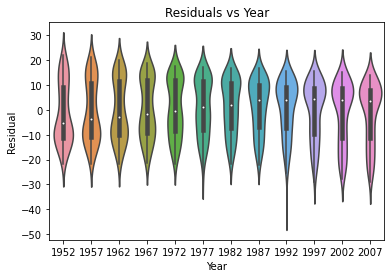

In [133]:
import seaborn as sns
data['residuals'] = data['lifeExp'] - (intercept + coeff*data['year'] )
sns.violinplot(x='year', y='residuals', data=data)
plt.xlabel("Year")
plt.ylabel("Residual")
plt.title("Residuals vs Year")
plt.show()

**Question 8** <br>
Yes, the violin plot of the residuals matches my expecations in that it looks similar to the original violin plot, and there were more negative residuals in the earlier years and more positive residuals in the later years.

**Exercise 4**<br>
In this part we create a boxplot of the model residuals for each continent

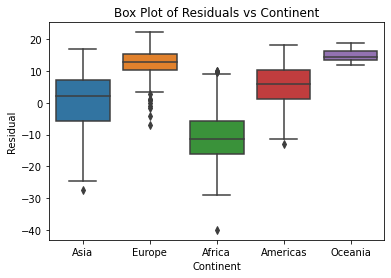

In [134]:
sns.boxplot(y='residuals', x='continent', data=data)
plt.xlabel("Continent")
plt.ylabel("Residual")
plt.title("Box Plot of Residuals vs Continent")
plt.show()


**Question 9**<br>
Yes, there appears to be a dependence between model residual and continent since the box plots for different continents have different shapes and lie at different heights on the residual axis. This suggests that the year is not the only variable that affects life expectancy, and continent/location also likely plays a role.

**Exercise 5**<br>
In this part we recreate the scatter plot we had before of life expectancy vs year, but this time, the dots are colored by their respective continent, and each continent has a regression line shown.

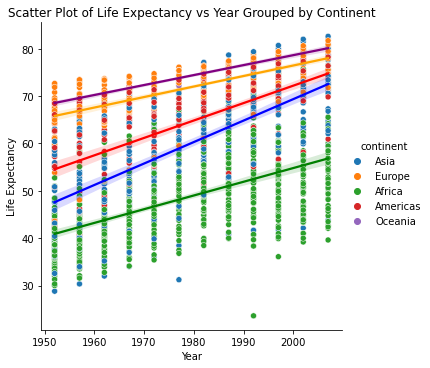

In [135]:
cont_groups = data.groupby('continent')
sns.relplot(data=data, x='year', y='lifeExp', hue='continent')
sns.regplot(data=cont_groups.get_group('Africa'), x='year', y='lifeExp', scatter=False, color='green')
sns.regplot(data=cont_groups.get_group('Asia'), x='year', y='lifeExp', scatter=False, color='blue')
sns.regplot(data=cont_groups.get_group('Europe'), x='year', y='lifeExp', scatter=False, color='orange')
sns.regplot(data=cont_groups.get_group('Americas'), x='year', y='lifeExp', scatter=False, color='red')
sns.regplot(data=cont_groups.get_group('Oceania'), x='year', y='lifeExp', scatter=False, color='purple')
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Scatter Plot of Life Expectancy vs Year Grouped by Continent")
plt.show()


**Question 10**<br>
Yes, the regression model should include an interaction term for continent AND year because we have already shown there is a relationship between life expectancy and year, but this plot shows there is very likely a relationship between continent and life expectancy, since there are fairly clear boundaries of one continent's life expectancy for a year, and another continent's. Additionally, the trend lines show different slopes with different intercepts.

**Exercise 6**<br>
In this part we create a new model which includes a term for the interaction between continent and life expectancy

In [136]:
data['continent'].unique()
model2 = smf.ols(formula='lifeExp ~ continent * year', data=data).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:12:24   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

**Question 11**<br>
The method used here to construct the regression model with an interaction term for continents uses one of the continents as a reference. In our case, Africa is being used as a reference, which means the effect of being in Africa on life expectancy has a regression coefficient of 0 in this model. This is because the continents are a categorical variable and a reference is needed, but none of the other parameters are 0.



**Question 12**<br>
Code:

In [137]:
inc_africa = model2.params['year']
inc_americas = model2.params['continent[T.Americas]:year'] + inc_africa
inc_asia = model2.params['continent[T.Asia]:year'] + inc_africa
inc_europe = model2.params['continent[T.Europe]:year'] + inc_africa
inc_oceania = model2.params['continent[T.Oceania]:year'] + inc_africa

print("Africa: increase of " + str(inc_africa) + " years in life expectancy per year")
print("Americas: increase of " + str(inc_americas) + " years in life expectancy per year")
print("Asia: increase of " + str(inc_asia) + " years in life expectancy per year")
print("Europe: increase of " + str(inc_europe) + " years in life expectancy per year")
print("Oceania: increase of " + str(inc_oceania) + " years in life expectancy per year")



Africa: increase of 0.2895292630445184 years in life expectancy per year
Americas: increase of 0.36765093706285346 years in life expectancy per year
Asia: increase of 0.45312240389899094 years in life expectancy per year
Europe: increase of 0.22193214452203344 years in life expectancy per year
Oceania: increase of 0.2102723776221585 years in life expectancy per year


**Exercise 7**<br>

In [138]:
print("F value of model with only year: " + str(model.fvalue))
print("F value of model with year and continent: " + str(model2.fvalue))


F value of model with only year: 398.6047457117627
F value of model with year and continent: 424.27290234006927


**Question 13**<br>
Yes, the interaction model is significantly better than the year only model as can be seen by the much larger f value for the second model.

**Exercise 8**<br>
For this part, we will make a residual vs year violin plot for the interaction model. This will be done by adding the residuals from the interaction model to the original datafram and using seaborn to create a violin plot.

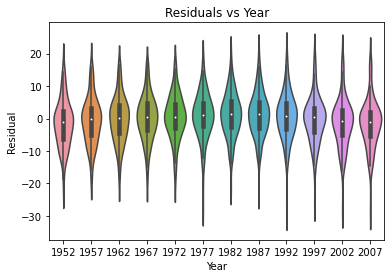

In [139]:
import seaborn as sns

data['residuals2'] = model2.resid
sns.violinplot(x='year', y='residuals2', data=data)
plt.xlabel("Year")
plt.ylabel("Residual")
plt.title("Residuals vs Year")
plt.show()

This violin plot of the residuals match the assumptions of the linear regression model well. The residuals seem to be fairly symmetrical around a value of 0, and the variance of the residuals seems to be fairly consistent. This suggests that the fitted values would be more accurate using this model than they would be using the previous year-only model.